# Präsentation der Ergebnisse (Regressions-Case)

#### Libraries

In [1]:
# libraries
import sys
import time
import random
import copy

import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy.linalg import inv
from tensorflow.python.ops.gen_array_ops import scatter_nd_eager_fallback
from tensorflow.python.ops.gen_logging_ops import timestamp
import matplotlib.pyplot as plt


Init Plugin
Init Graph Optimizer
Init Kernel


#### Set-Up für Sims:

In [2]:
# Set seed
random.seed(42)

# Einfach Regressions Fall:

$y = \beta_0 + \beta_1 * x$

## Daten Simulieren

In [3]:
n = 100
X = np.random.normal(loc=0.0, scale=1.0, size =n)
X = X.reshape(n, 1)
koef = np.array((3))
koef = koef.reshape(1,1)
noise = np.random.normal(loc=0.0, scale=1.0, size=n)
noise = noise.reshape(n, 1)
y = 1 + np.matmul(X, koef) + noise
y = pd.DataFrame(y)
X = pd.DataFrame(X)

## Hyperparameter u. Rest:

- Differenz (h): 0.0001
- Optimieren über Gradient Descent, daher Batch_size = n


In [4]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

## Grundlegendes Modell:

In [5]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
model0.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
model0.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-01-20 21:15:57.482536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-20 21:15:57.482657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
hist = model0.fit(X, y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)

2022-01-20 21:15:57.553401: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-20 21:15:57.553598: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-20 21:15:57.628217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


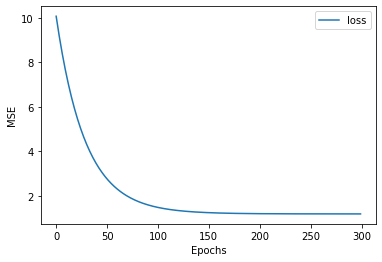

In [7]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [8]:
# "Schätzer"
yhat = model0.predict(X)
model0.get_weights()

2022-01-20 21:15:58.533901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[array([[3.020179]], dtype=float32), array([0.9768415], dtype=float32)]

In [9]:
hist.history['loss'][n - 1]

1.4908201694488525

## Finite Differenzes


In [10]:

gewichte_m1 = [ ]
h = 0.00001
y_iter = []
gewichte_m2 = [ ]
fits = []

In [11]:
%%capture
for i in range(len(X)):
  temp_y = copy.deepcopy(y)
  temp_y.loc[i] += h
  y_iter.append(temp_y)
  np.sum(temp_y - y)
  model2 = tf.keras.Sequential();
  model2.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)));
  model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt);
  hist = model2.fit(X, temp_y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0);
  coefs_m2 = np.vstack((model2.get_weights()[0]))
  gewichte_m2.append( coefs_m2 )
  temp_pred = model2.predict(X)
  fits.append(temp_pred[i]);

2022-01-20 21:15:58.663717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 21:15:59.459374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 21:15:59.519335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 21:16:00.322333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 21:16:00.384097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 21:16:01.179154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 21:16:01.240922: I tensorflow/core/grappler/optimizers/cust

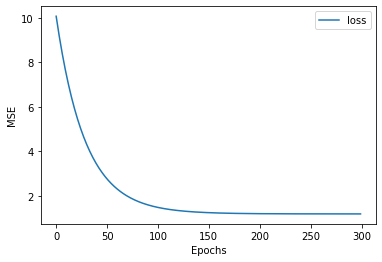

In [12]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [13]:
np.sum((fits - yhat) / h)

1.7940998

# Zwei Parameter Regression ein Hidden Layer

## Grundlegendes Modell

In [ ]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
model0.add(tf.keras.layers.Dense(1,  activation='linear'))
model0.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
model0.summary()

In [ ]:
history = model0.fit(X, y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)

In [ ]:
plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# "Schätzer"
yhat = model0.predict(X)
model0.get_weights()

## Finite Differenzen:

In [ ]:
gewichte_m1 = [ ]
y_iter = []
gewichte_m2 = [ ]
fits = []

In [ ]:
for i in range(len(X)):
  temp_y = copy.deepcopy(y)
  temp_y.loc[i] += h
  y_iter.append(temp_y)
  np.sum(temp_y - y)
  # Fitten der Modelle:
  model2 = tf.keras.Sequential()
  model2.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
  model2.add(tf.keras.layers.Dense(1,  activation='linear'))
  model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
  hist = model2.fit(X, temp_y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)
  coefs_m2 = np.vstack((model2.get_weights()[0]))
  gewichte_m2.append( coefs_m2 )
  temp_pred = model2.predict(X)
  fits.append(temp_pred[i])

In [ ]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
np.sum((fits - yhat) / h)

# Zwei Parameter Regression zwei Hidden Layer

## Grundlegendes Modell:

In [ ]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
model0.add(tf.keras.layers.Dense(1,  activation='linear'))
model0.add(tf.keras.layers.Dense(1,  activation='linear'))
model0.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
model0.summary()

In [ ]:
history = model0.fit(X, y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# "Schätzer"
yhat = model0.predict(X)
model0.get_weights()

## Finite Differenzen

In [ ]:
gewichte_m1 = [ ]
y_iter = []
gewichte_m2 = [ ]
fits = []

In [ ]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
np.sum((fits - yhat) / h)